In [10]:
import warnings
import pandas as pd 
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

lb = LabelEncoder()
sc = StandardScaler()

In [11]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', names = ['sepal length','sepal width','petal length','petal width','class'])
df = df.drop(['class'],axis = 1)

In [42]:
def discretization (df , nbins = 1):


    if(not isinstance(df,pd.DataFrame)):
        sys.exit("Can only work with Data Frames!")
    #' Rows or columns equal to zero?
    if (len(df.columns) == 0 or len(df.index) == 0): 
        sys.exit("Can only work with non-empty Data Frames!")
    
    if(nbins == 1):
        nbins = int(len(df.index)*(1/3))
    print(nbins)
    lb = LabelEncoder()

    if (isinstance(nbins,np.int)):

        #Object -> String 
        #Numeric -> (Float o int)
        warnings.warn("Discretizing data!")

        df.update(df.select_dtypes(exclude = ['float64',np.int]).apply((lambda x : lb.fit_transform(x)), axis = 0))
        df.update(df.select_dtypes(include = ['float64',np.int]).apply((lambda x : pd.cut(x, bins = nbins , labels = list(range(nbins))))).astype('object'))

        disc = df.astype('category')

    else: 

        ##warning
        sys.exit("Number of bins for discretizing must be integer")

    return disc


In [20]:
sc.fit_transform(df['sepal length'].values)

ValueError: Expected 2D array, got 1D array instead:
array=[5.1 4.9 4.7 4.6 5.  5.4 4.6 5.  4.4 4.9 5.4 4.8 4.8 4.3 5.8 5.7 5.4 5.1
 5.7 5.1 5.4 5.1 4.6 5.1 4.8 5.  5.  5.2 5.2 4.7 4.8 5.4 5.2 5.5 4.9 5.
 5.5 4.9 4.4 5.1 5.  4.5 4.4 5.  5.1 4.8 5.1 4.6 5.3 5.  7.  6.4 6.9 5.5
 6.5 5.7 6.3 4.9 6.6 5.2 5.  5.9 6.  6.1 5.6 6.7 5.6 5.8 6.2 5.6 5.9 6.1
 6.3 6.1 6.4 6.6 6.8 6.7 6.  5.7 5.5 5.5 5.8 6.  5.4 6.  6.7 6.3 5.6 5.5
 5.5 6.1 5.8 5.  5.6 5.7 5.7 6.2 5.1 5.7 6.3 5.8 7.1 6.3 6.5 7.6 4.9 7.3
 6.7 7.2 6.5 6.4 6.8 5.7 5.8 6.4 6.5 7.7 7.7 6.  6.9 5.6 7.7 6.3 6.7 7.2
 6.2 6.1 6.4 7.2 7.4 7.9 6.4 6.3 6.1 7.7 6.3 6.4 6.  6.9 6.7 6.9 5.8 6.8
 6.7 6.7 6.3 6.5 6.2 5.9].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [22]:
x = df.select_dtypes(include = ['float64',np.int]).values

In [26]:
x = sc.fit_transform(x)

In [29]:
x.shape

(150, 4)

In [33]:
df = pd.DataFrame(x,columns=df.columns)

In [43]:
fr = discretization(df)

50


/Users/jaime.de.los.rios/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:19: UserWarning: Discretizing data!


,sepal length,sepal width,petal length,petal width
0,11,31,3,2
1,8,20,3,2
2,5,24,2,2
3,4,22,4,2
4,9,33,3,2
5,15,39,5,6
6,4,29,3,4
7,9,29,4,2
8,1,18,3,2
9,8,22,4,0


In [46]:
from codetriangle.sentropies import *
from codetriangle.coordsentropic import *
from codetriangle.entropytriangle import *

In [47]:
edf = sentropies_df(df , 'total')

50


/Users/jaime.de.los.rios/Documents/Jupyter Prueba Fran/codetriangle/sentropies.py:111: UserWarning: Discretizing data from X DataFrame before entropy calculation!
  warnings.warn("Discretizing data from X DataFrame before entropy calculation!")
/Users/jaime.de.los.rios/Documents/Jupyter Prueba Fran/codetriangle/auxfunc.py:35: UserWarning: Discretizing data!
  warnings.warn("Discretizing data!")


In [48]:
edf

,H_Uxi,H_Pxi,DeltaH_Pxi,M_Pxi,VI_Pxi
Name,,,,,
sepal length,5.129283,4.822018,0.307265,4.723652,0.098366
sepal width,4.523562,4.011710,0.511852,3.958376,0.053333
petal length,5.209453,4.786520,0.422933,4.733187,0.053333
petal width,4.459432,4.065663,0.393769,3.985663,0.080000
All,19.321730,17.685911,1.635819,17.400878,0.285033


In [50]:
points = entcoords(edf)

In [51]:
points

[array([ 5.99040699, 92.09186072,  1.91773229]),
 array([11.3152467 , 87.50574141,  1.17901189]),
 array([ 8.11857201, 90.85764815,  1.02377984]),
 array([ 8.83001957, 89.37602983,  1.79395059]),
 array([ 8.46621413, 90.05859403,  1.47519184])]

In [54]:
rt = sjoin(df,lis = df.columns)
H_Px = ent(sjoin(df,lis = df.columns))

In [59]:
H_Ux = np.log2(len(rt.unique()))

In [60]:
H_Px

7.183786107148123

In [76]:
delta = np.log2(len(rt.unique())) - ent(sjoin(df,lis = df.columns))
vi = np.sum(condentropies(df))
mi = H_Px - vi
point = np.array([delta,mi,vi])

In [73]:
etplot(point)

SystemExit: Can only work with Data Frames! (X it´s not a DataFrame)

/Users/jaime.de.los.rios/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2971: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [77]:
(point/H_Ux)*100

array([ 0.22065223, 95.82038173,  3.95896604])

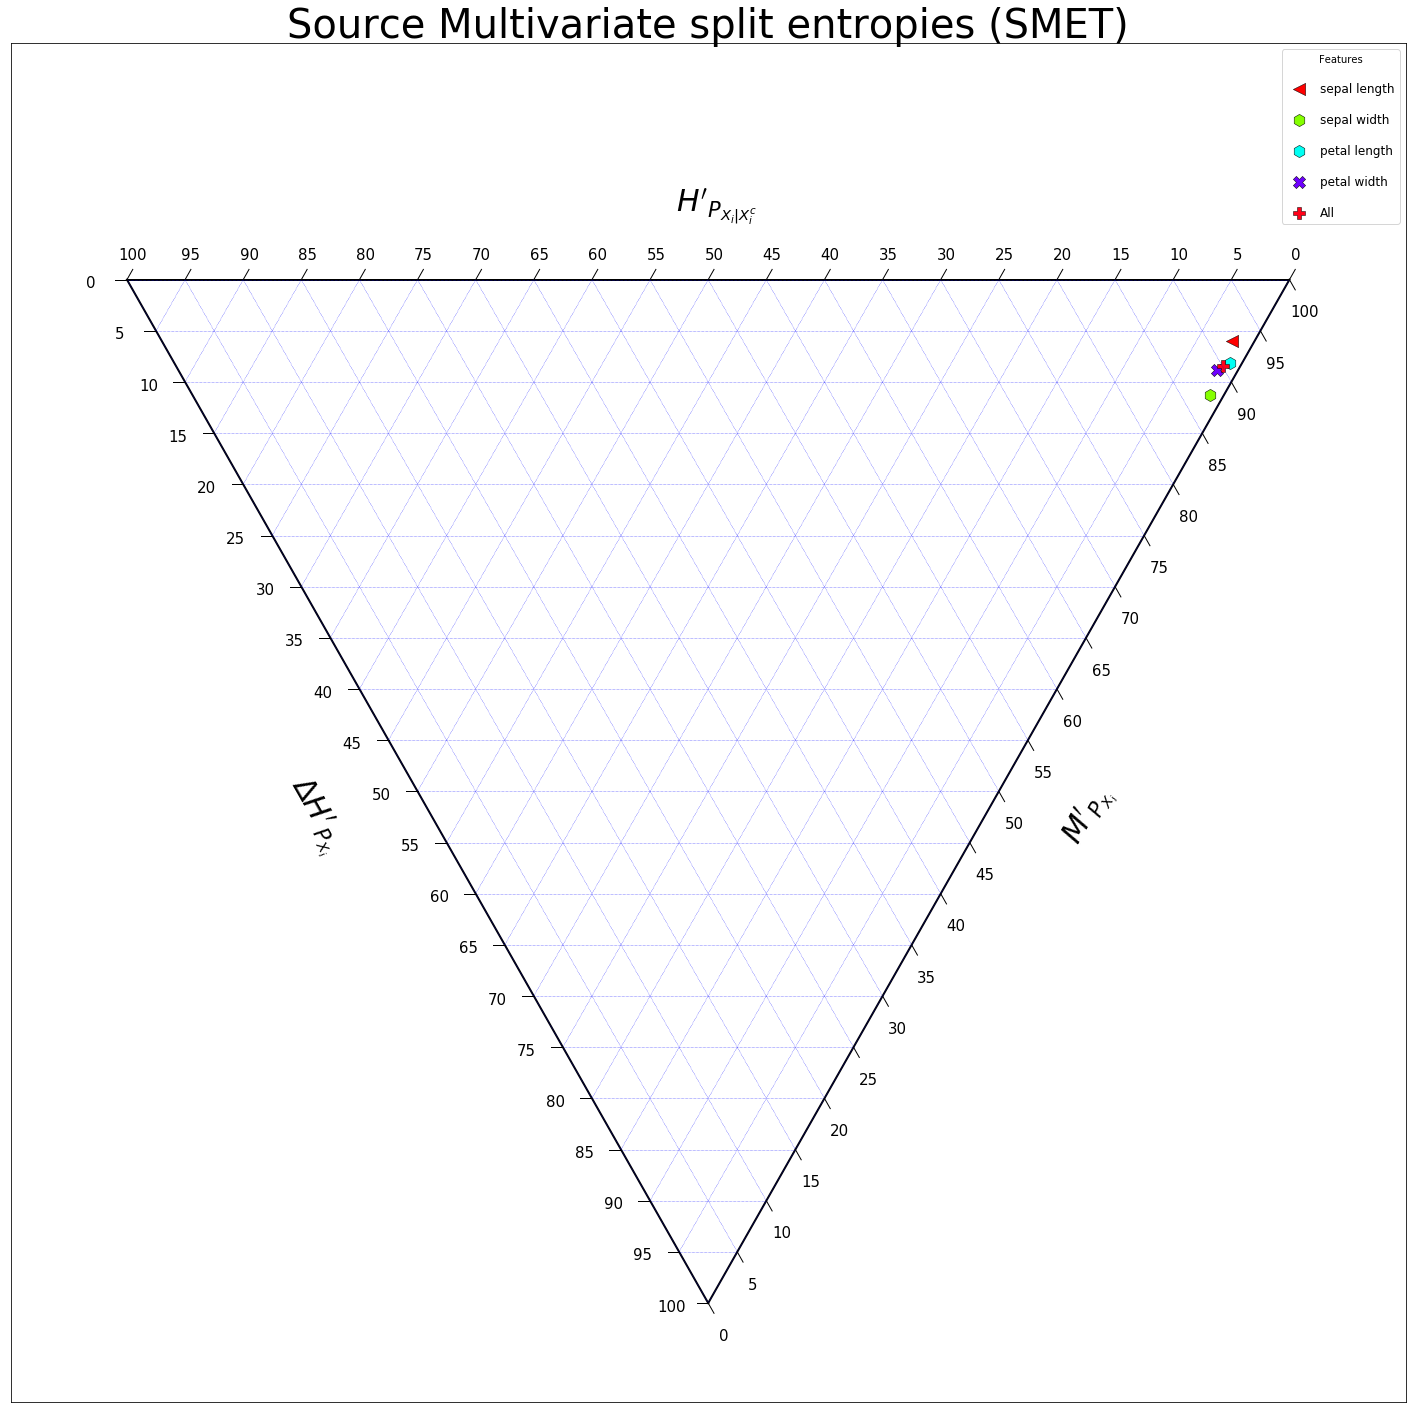

In [78]:
etplot(edf)

In [12]:
e = df.apply(lambda x : pd.factorize(x),axis = 0)

In [13]:
r = pd.DataFrame(e)

In [14]:
r

,0
sepal length,"([0, 1, 2, 3, 4, 5, 3, 4, 6, 1, 5, 7, 7, 8, 9,..."
sepal width,"([0, 1, 2, 3, 4, 5, 6, 6, 7, 3, 8, 6, 1, 1, 9,..."
petal length,"([0, 0, 1, 2, 0, 3, 0, 2, 0, 2, 2, 4, 0, 5, 6,..."
petal width,"([0, 0, 0, 0, 0, 1, 2, 0, 0, 3, 0, 0, 3, 3, 0,..."
